In [24]:
import numpy as np

import mne
from mne.datasets import fetch_fsaverage

# paths to mne datasets - sample sEEG and FreeSurfer's fsaverage subject
# which is in MNI space
misc_path = mne.datasets.misc.data_path()
sample_path = mne.datasets.sample.data_path()
subjects_dir = sample_path / "subjects"

# use mne-python's fsaverage data
fetch_fsaverage(subjects_dir=subjects_dir, verbose=True)  # downloads if needed

0 files missing from root.txt in /Users/hamzaabdelhedi/mne_data/MNE-sample-data/subjects
0 files missing from bem.txt in /Users/hamzaabdelhedi/mne_data/MNE-sample-data/subjects/fsaverage


PosixPath('/Users/hamzaabdelhedi/mne_data/MNE-sample-data/subjects/fsaverage')

In [25]:
raw = mne.io.read_raw(misc_path / "seeg" / "sample_seeg_ieeg.fif")

epochs = mne.Epochs(raw, detrend=1, baseline=None)
epochs = epochs["Response"][0]  # just process one epoch of data for speed

Opening raw data file /Users/hamzaabdelhedi/mne_data/MNE-misc-data/seeg/sample_seeg_ieeg.fif...
    Range : 1310640 ... 1370605 =   1311.411 ...  1371.411 secs
Ready.
Used Annotations descriptions: ['Fixation', 'Go Cue', 'ISI Onset', 'Response']
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
32 matching events found
No baseline correction applied
0 projection items activated


In [27]:
epochs.info['dig']

[<DigPoint |        LPA : (-82.7, -0.0, -0.0) mm    : head frame>,
 <DigPoint |     Nasion : (0.0, 108.5, -0.0) mm     : head frame>,
 <DigPoint |        RPA : (76.7, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-25.2, 34.9, -12.1) mm   : head frame>,
 <DigPoint |     EEG #2 : (-27.8, 36.2, -10.6) mm   : head frame>,
 <DigPoint |     EEG #3 : (-30.6, 37.6, -8.8) mm    : head frame>,
 <DigPoint |     EEG #4 : (-33.1, 40.0, -7.5) mm    : head frame>,
 <DigPoint |     EEG #5 : (-35.2, 41.7, -6.1) mm    : head frame>,
 <DigPoint |     EEG #6 : (-38.7, 42.8, -4.5) mm    : head frame>,
 <DigPoint |     EEG #7 : (-41.2, 44.5, -2.6) mm    : head frame>,
 <DigPoint |     EEG #8 : (-30.2, 25.1, 15.4) mm    : head frame>,
 <DigPoint |     EEG #9 : (-35.2, 25.4, 15.7) mm    : head frame>,
 <DigPoint |    EEG #10 : (-40.3, 27.9, 15.6) mm    : head frame>,
 <DigPoint |    EEG #11 : (-45.4, 28.7, 15.7) mm    : head frame>,
 <DigPoint |    EEG #12 : (-51.1, 29.5, 15.7) mm    : head fra

In [28]:
montage = epochs.get_montage()
montage.get_positions()

{'ch_pos': OrderedDict([('LENT 1',
               array([-0.02599896,  0.03496219, -0.01177379])),
              ('LENT 2', array([-0.02802877,  0.03632598, -0.01058123])),
              ('LENT 3', array([-0.03118957,  0.03860331, -0.00859106])),
              ('LENT 4', array([-0.03401865,  0.04032961, -0.00720417])),
              ('LENT 5', array([-0.03648156,  0.04153646, -0.00573773])),
              ('LENT 6', array([-0.03889979,  0.04304397, -0.00435109])),
              ('LENT 7', array([-0.04162819,  0.04440622, -0.00225585])),
              ('LAMY 1', array([-0.03077847,  0.02518284,  0.01588669])),
              ('LAMY 2', array([-0.03536642,  0.02578583,  0.01602288])),
              ('LAMY 3', array([-0.04030123,  0.02709477,  0.01601438])),
              ('LAMY 4', array([-0.04577494,  0.02779156,  0.01614306])),
              ('LAMY 5', array([-0.05076303,  0.02902571,  0.01571037])),
              ('LAMY 6', array([-0.05676112,  0.02998562,  0.01619141])),
             

In [11]:
montage = epochs.get_montage()

# first we need a head to mri transform since the data is stored in "head"
# coordinates, let's load the mri to head transform and invert it
this_subject_dir = misc_path / "seeg"
head_mri_t = mne.coreg.estimate_head_mri_t("sample_seeg", this_subject_dir)
# apply the transform to our montage
montage.apply_trans(head_mri_t)

# now let's load our Talairach transform and apply it
mri_mni_t = mne.read_talxfm("sample_seeg", misc_path / "seeg")
montage.apply_trans(mri_mni_t)  # mri to mni_tal (MNI Taliarach)

# for fsaverage, "mri" and "mni_tal" are equivalent and, since
# we want to plot in fsaverage "mri" space, we need use an identity
# transform to equate these coordinate frames
montage.apply_trans(mne.transforms.Transform(fro="mni_tal", to="mri", trans=np.eye(4)))

epochs.set_montage(montage)

<Epochs | 1 events (good & bad), -0.2 – 0.5 s (baseline off), ~144 KiB, data not loaded,
 'Response': 1>

In [12]:
mri_mni_t

<Transform | MRI (surface RAS)->MNI Talairach>
[[ 1.034711   -0.031984    0.000077    0.00283487]
 [ 0.002632    1.051053    0.130621   -0.0105593 ]
 [-0.001545   -0.217038    1.050977    0.01264827]
 [ 0.          0.          0.          1.        ]]

In [17]:
maxima = []
for i in range(len(epochs.info["chs"])):
    maxima.append(epochs.info["chs"][i]["loc"].max())
print(max(maxima))

0.10342711904790342


In [20]:
raw.info.get("dig")

[<DigPoint |        LPA : (-82.7, -0.0, -0.0) mm    : head frame>,
 <DigPoint |     Nasion : (0.0, 108.5, -0.0) mm     : head frame>,
 <DigPoint |        RPA : (76.7, 0.0, 0.0) mm       : head frame>,
 <DigPoint |     EEG #1 : (-25.2, 34.9, -12.1) mm   : head frame>,
 <DigPoint |     EEG #2 : (-27.8, 36.2, -10.6) mm   : head frame>,
 <DigPoint |     EEG #3 : (-30.6, 37.6, -8.8) mm    : head frame>,
 <DigPoint |     EEG #4 : (-33.1, 40.0, -7.5) mm    : head frame>,
 <DigPoint |     EEG #5 : (-35.2, 41.7, -6.1) mm    : head frame>,
 <DigPoint |     EEG #6 : (-38.7, 42.8, -4.5) mm    : head frame>,
 <DigPoint |     EEG #7 : (-41.2, 44.5, -2.6) mm    : head frame>,
 <DigPoint |     EEG #8 : (-30.2, 25.1, 15.4) mm    : head frame>,
 <DigPoint |     EEG #9 : (-35.2, 25.4, 15.7) mm    : head frame>,
 <DigPoint |    EEG #10 : (-40.3, 27.9, 15.6) mm    : head frame>,
 <DigPoint |    EEG #11 : (-45.4, 28.7, 15.7) mm    : head frame>,
 <DigPoint |    EEG #12 : (-51.1, 29.5, 15.7) mm    : head fra

In [27]:
trans

<Transform | MRI (surface RAS)->head>
[[ 0.99999367  0.00355187  0.00020205  2.58106841]
 [-0.00355762  0.99838913  0.05662586  0.03109435]
 [-0.00000059 -0.05662622  0.99839545  0.03959725]
 [ 0.          0.          0.          1.        ]]

In [20]:
# compute the transform to head for plotting
trans = mne.channels.compute_native_head_t(montage)
# note that this is the same as:
# ``mne.transforms.invert_transform(
#      mne.transforms.combine_transforms(head_mri_t, mri_mni_t))``

view_kwargs = dict(azimuth=105, elevation=100, focalpoint=(0, 0, -15))
brain = mne.viz.Brain(
    "fsaverage",
    subjects_dir=subjects_dir,
    cortex="low_contrast",
    alpha=0.25,
    background="white",
)
brain.add_sensors(raw.info, trans=trans)
brain.add_head(alpha=0.25, color="tan")
brain.show_view(distance=400, **view_kwargs)

Using notebook 3d backend.


Channel types::	seeg: 96
Using fsaverage-head-dense.fif for head surface.
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read


In [21]:
brain = mne.viz.Brain(
    "fsaverage", subjects_dir=subjects_dir, surf="inflated", background="black"
)
brain.add_annotation("aparc.a2009s")
brain.add_sensors(raw.info, trans=trans)
brain.show_view(distance=500, **view_kwargs)

Channel types::	seeg: 96


In [22]:
brain = mne.viz.Brain(
    "fsaverage", subjects_dir=subjects_dir, surf="flat", background="black"
)
brain.add_annotation("aparc.a2009s")
brain.add_sensors(raw.info, trans=trans)

Channel types::	seeg: 96


In [23]:
aseg = "aparc+aseg"  # parcellation/anatomical segmentation atlas
labels, colors = mne.get_montage_volume_labels(
    montage, "fsaverage", subjects_dir=subjects_dir, aseg=aseg
)

# separate by electrodes which have names like LAMY 1
electrodes = set(
    [
        "".join([lttr for lttr in ch_name if not lttr.isdigit() and lttr != " "])
        for ch_name in montage.ch_names
    ]
)
print(f"Electrodes in the dataset: {electrodes}")

electrodes = ("LPM", "LSMA")  # choose two for this example
for elec in electrodes:
    picks = [ch_name for ch_name in raw.ch_names if elec in ch_name]
    fig, ax = mne.viz.plot_channel_labels_circle(labels, colors, picks=picks)
    fig.text(0.3, 0.9, "Anatomical Labels", color="white")

IndexError: index 14699 is out of bounds for axis 0 with size 256

In [13]:
picks = [
    ii
    for ii, ch_name in enumerate(epochs.ch_names)
    if any([elec in ch_name for elec in electrodes])
]
labels = (
    "ctx-lh-caudalmiddlefrontal",
    "ctx-lh-precentral",
    "ctx-lh-superiorfrontal",
    "Left-Putamen",
)

fig = mne.viz.plot_alignment(
    mne.pick_info(epochs.info, picks),
    trans,
    "fsaverage",
    subjects_dir=subjects_dir,
    surfaces=[],
    coord_frame="mri",
)

brain = mne.viz.Brain(
    "fsaverage",
    alpha=0.1,
    cortex="low_contrast",
    subjects_dir=subjects_dir,
    units="m",
    figure=fig,
)
brain.add_volume_labels(aseg="aparc+aseg", labels=labels)
brain.show_view(azimuth=120, elevation=90, distance=0.25)

Channel types::	seeg: 25


A view with name (P_0x337c11890_4) is already registered
 => returning previous one


    Smoothing by a factor of 0.9


Loading data for 1 events and 701 original time points ...
0 bad epochs dropped
Using matplotlib as 2D backend.
Loading data for 1 events and 701 original time points ...


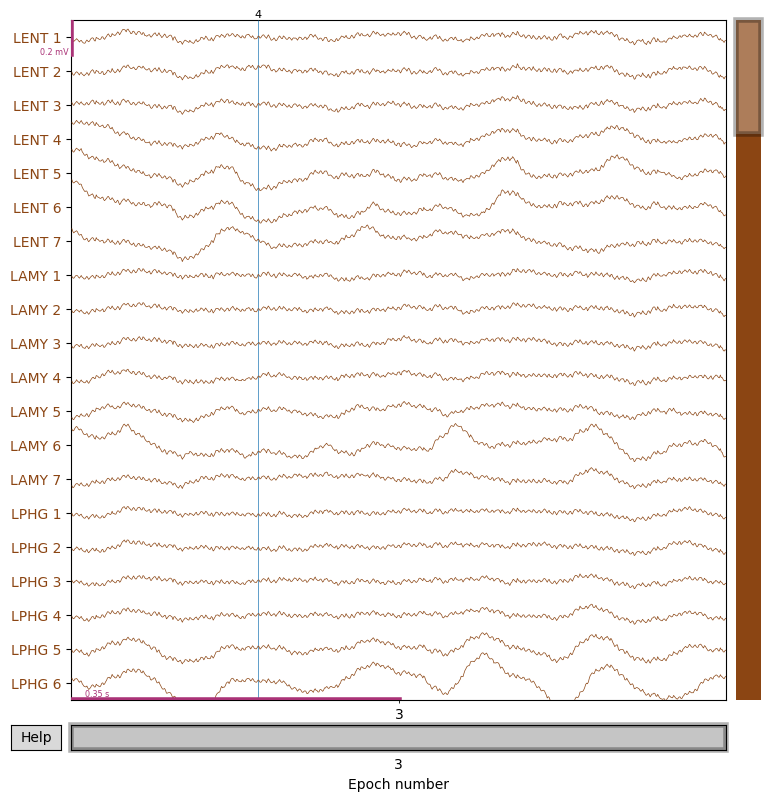

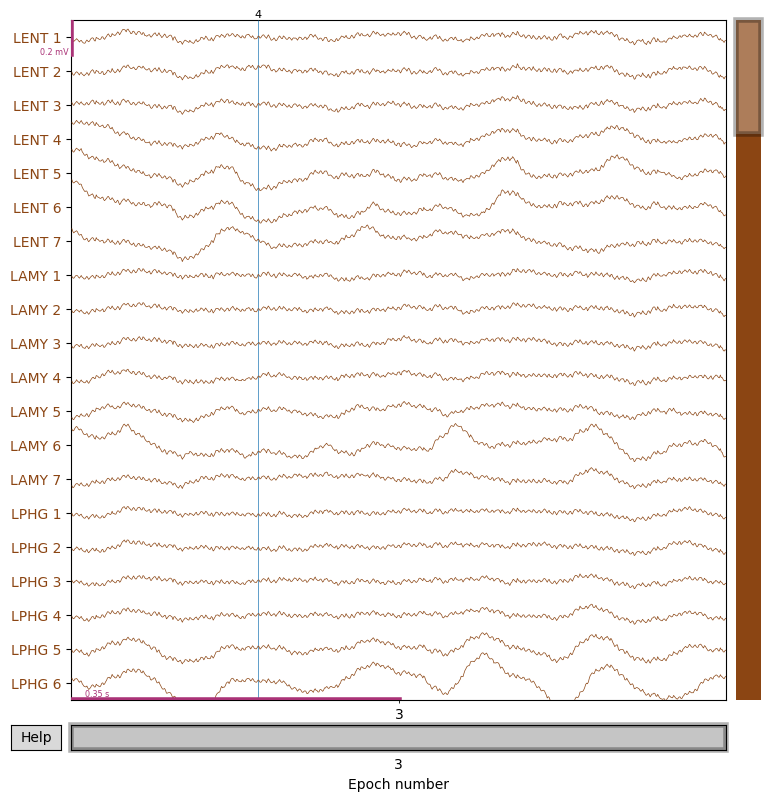

In [14]:
epochs.plot(events=True)

In [15]:
# get standard fsaverage volume (5mm grid) source space
fname_src = subjects_dir / "fsaverage" / "bem" / "fsaverage-vol-5-src.fif"
vol_src = mne.read_source_spaces(fname_src)

evoked = epochs.average()
stc = mne.stc_near_sensors(
    evoked,
    trans,
    "fsaverage",
    subjects_dir=subjects_dir,
    src=vol_src,
    surface=None,
    verbose="error",
)
stc = abs(stc)  # just look at magnitude
clim = dict(kind="value", lims=np.percentile(abs(evoked.data), [10, 50, 75]))

    Reading a source space...
    [done]
    1 source spaces read


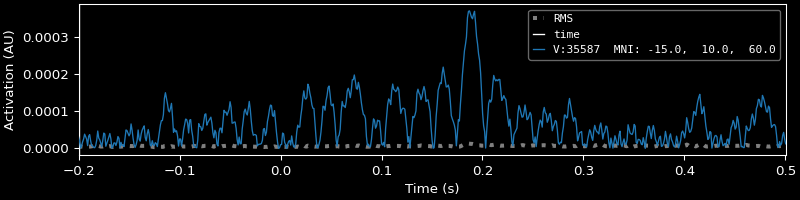

ERROR:root:Exception raised
ERROR:root:KeyError('6b77d22ac5700c5e924dc0e34aea9da7_5563656d')
ERROR:root:Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/wslink/protocol.py", line 330, in onMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/opt/homebrew/lib/python3.11/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 30, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: '6b77d22ac5700c5e924dc0e34aea9da7_5563656d'

ERROR:root:Exception raised
ERROR:root:KeyError('6b77d22ac5700c5e924dc0e34aea9da7_5563656d')
ERROR:root:Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/wslink/protocol.py", line 3

In [ ]:
brain = stc.plot_3d(
    src=vol_src,
    subjects_dir=subjects_dir,
    view_layout="horizontal",
    views=["axial", "coronal", "sagittal"],
    size=(800, 300),
    show_traces=0.4,
    clim=clim,
    add_data_kwargs=dict(colorbar_kwargs=dict(label_font_size=8)),
)

# You can save a movie like the one on our documentation website with:
# brain.save_movie(time_dilation=3, interpolation='linear', framerate=5,
#                  time_viewer=True, filename='./mne-test-seeg.m4')

In [4]:
path = "/Users/hamzaabdelhedi/Projects/data/olfaction/_labels"

In [5]:
import pandas as pd
import os
path_file = os.path.join(path, "Elecs_CHAF_labels_aal.csv")

In [6]:
file = pd.read_csv(path_file)

In [7]:
file

,Unnamed: 0,Text,aal,index,Replaced with,X,Y,Z,hemisphere,labels,channels
0,0,NaN,Cingulum Mid (L),33,-1,-14.70,-31.20,45.45,Left,PCC-PCL,a'2-a'1
1,1,NaN,Cingulum Mid (L),33,-1,-15.50,-31.45,49.30,Left,PCL&PCC-PCL,a'3-a'2
2,2,NaN,Cingulum Mid (L),33,NaN,-16.30,-31.65,53.15,Left,PrG-PoG&PCL,a'4-a'3
3,3,NaN,Postcentral (L),57,NaN,-17.10,-31.75,56.95,Left,PrG-PoG,a'5-a'4
4,4,NaN,Postcentral (L),57,NaN,-17.90,-31.90,60.70,Left,PrG-PoG,a'6-a'5
...,...,...,...,...,...,...,...,...,...,...,...
91,91,NaN,Frontal Mid (L),7,NaN,-20.50,13.70,34.35,Left,MFG-IFGOp&PrG,j'11-j'10
92,92,NaN,Frontal Mid (L),7,NaN,-20.30,17.15,34.45,Left,MFG-IFGOp,j'12-j'11
93,93,NaN,Frontal Mid (L),7,NaN,-20.05,20.60,34.60,Left,MFG&MFG-IFGOp,j'13-j'12
94,94,NaN,Frontal Mid (L),7,NaN,-19.75,24.05,34.85,Left,MFG,j'14-j'13
